In [5]:
using Distributions, Plots, StatsPlots, Statistics

#### 1

Our data, $X_i$s, are $[4,4,3,0,5,0,4,2,2,1]$ so the sample mean, $\bar x = 2.5$, and it is our estimator
of $\lambda$, $\hat \lambda$

In [8]:
data_south = [4,4,3,0,5,0,4,2,2,1]
x_bar = mean(data_south)
println("x bar: ", x_bar)
s = std(data_south)
println("s: ",s)

x bar: 2.5
s: 1.7795130420052185


#### 2

See the minitab file or the graphs below. 
It does not look like our sample came from the Poisson distribution with $\lambda=2.5$ because these two do not have similar shape.
The true Poisson(2.5) is skewed right with the mode at $x=2$, but the histogram of our sample is skewed left with the mode at.
$x=4$. Also, the histogram of our sample fluctuates a lot while the true Poisson(2.5) increases until the mode and then decreases. Another problem is that we only have 10 samples, which is not large enought to get a similar shape to the population distribution.    

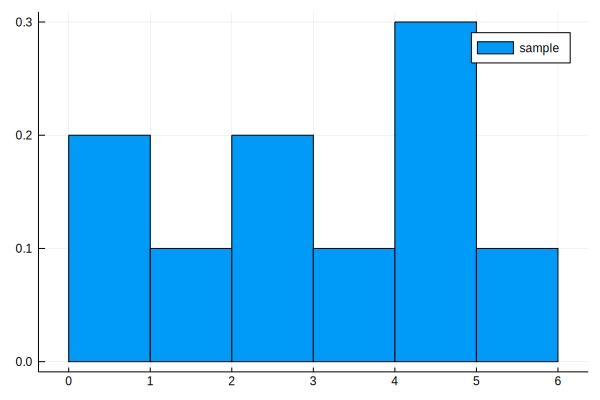

In [9]:
histogram(data_south, norm=true, bins=5, label="sample")

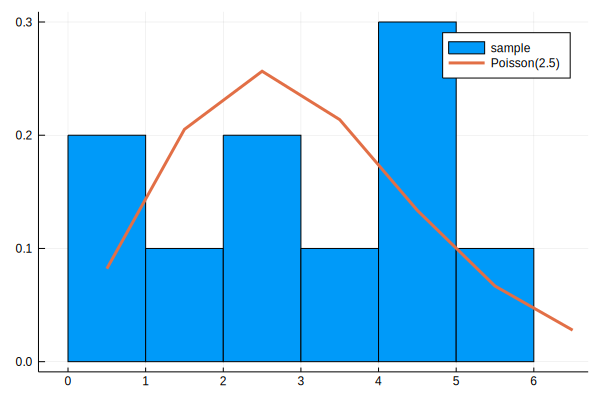

In [10]:
plot!(0.5:1:6.5,pdf.(Poisson(x_bar),0:6), label="Poisson(2.5)", linewidth=3)

#### 3

The moment generating function of Poisson($\lambda$) is $M_X(t)=e^{\lambda(e^t-1)}$. Then we know that $M_Y(t)=[M_X(t)]^n$, where $Y=\sum_{i=1}^n X_i$ so $M_Y(t)=[e^{\lambda(e^t-1)}]^n=e^{(n\lambda)(e^t-1)}$. Therefore, we can see $Y\sim Poisson(n\lambda)$ when $X\sim Poisson(\lambda)$. Since $n=10$ in our case, $Y\sim Poisson(10* \hat \lambda)$, where $\hat \lambda = \bar x = 2.5$. Therefore we could approximate $80 \%$ CI for $\lambda$ by finding the values that produce the cumulative probability of $0.1$ and $0.9$ of $Poisson(25)$ and then by dividing the two values by $10 \because$ there is one-to-one relationship between $\hat \lambda$ and $10*\hat \lambda$.

Minitab returned $32$ and $19$ as the values that generate the cumulative probabiliy of $0.9$ and $0.1$ respectively. Furthermore, if Minitab generated $P(X \leq 32)=0.928544$ and $P(X \leq 19)=0.133575$ so the approximate $80\%$ CI for $\lambda$ is $(1.9,3.2]$ which was actually the approximate $(0.928544-0.133575)*100=79.5\%$ CI for $\lambda$   

Therefore, there was $79.5\%$ chance that we took a good/representative sample, and if we did, the average number of cars heading south along I-380 south of Cedar Rapids in every $6$ seconds is somewhere between the interval, $(1.9, 3.2]$  

In [11]:
(0.928544 - 0.133575)*100

79.49690000000001

#### 4

In this question, I used a formula, $\bar x \, \pm t_{n-1,\,\alpha/2} \frac{s}{\sqrt{n}}$ since $n<30$ and $\bar x = \hat \lambda$. In our case, $\bar x=2.5, s=1.78, n=10, \alpha = 0.2, t_{9,\,0.1}=1.383$. After plugging these values into the formula, I got $(1.7,3.3)$

Therefore, there was $80\%$ chance that we took a good/representative sample, and if we did, the average number of cars heading south along I-380 south of Cedar Rapids in every $6$ seconds is somewhere between the interval, $(1.7, 3.3)$   

In [12]:
x_bar - 1.383*s/sqrt(10), x_bar + 1.383*s/sqrt(10)

(1.7217424269562165, 3.2782575730437835)

#### 5

An $80\%$ Bootstrap CI for $\mu$ was $(1.8, 3.2]$. In Minitab,the sorted mean was $1.8$ until the $2325$th value and $3.2$ until the $18432$th value. Therefore it was really a $\frac{18432-2325}{20000}*100 = 80.525\%$ CI for $\mu$.  Therefore, there was $80.535\%$ chance that we took a representative sample, and if we did, the population mean, the average number of cars heading south along I-380 south of Cedar Rapids in every $6$ seconds is somewhere between the interval, $(1.8, 3.2]$.   

An $80\%$ Bootstrap CI for $\sigma^2$ was $(1.73333, 4.0]$.In Minitab, the sorted variance was $1.73333$ until the $2005$th value and $4.0$ until the $18019$th value. Therefore, it was really a $\frac{18019-2005}{20000}*100=80.07\%$ CI for $\sigma^2$ Therefore, there was $80.07\%$ chance that we took a representative sample, and if we did, the population variance, average squared points away from the population mean, the average cars heading south along I-380 south of Cedar Rapids, was somewhere between the interval $(1.73333, 4.0]$. 

We can see that there is overlap between the CI of the mean and the CI of the variance, which means that these could take the same value. If the number of cars heading south along I-380 south of Cedar Rapids is distributed as Poisson, the population mean and the population variance are the same. Therefore, it is reasonable to suspect that our data came from Poisson, which does not back up my answer in question 2.


In [13]:
(18432-2325)/20000*100, (18019-2005)/20000*100

(80.535, 80.07)

###### The calculations below just showed the logic I used to find the exact percentage. The numbers of question 5 are based on Minitab 

In [14]:
resampled_data = rand(data_south, 200000)
resampled_data = reshape(resampled_data,20000,10)

means = []
vars = []
for i in 1:20000
    push!(means,mean(resampled_data[i,:]))
    push!(vars, var(resampled_data[i,:]))
end

In [15]:
means = sort(means)
vars = sort(vars)
num = 1
num2 = 1
while means[num] <= means[2000]
    num+=1
end

while means[num2] <= means[18000]
    num2+=1
end
true_percent_mean = (num2/20000 - num/20000)*100

num=1
num2=1
while vars[num] <= vars[2000]
    num+=1
end
while vars[num2] <= vars[18000]
    num2+=1
end

true_percent_var = (num2/20000 - num/20000)*100
println(true_percent_mean, "%CI for μ: (", means[2000],", ", means[18000],"]")
println(true_percent_var,"% CI for σ²: (", vars[2000], ", ", vars[18000],"]")
println("means μ: ", mean(means), " σ²: ", mean(vars))

80.72500000000001%CI for μ: (1.8, 3.2]
79.90499999999999% CI for σ²: (1.7888888888888888, 4.0]
means μ: 2.5024600000000006 σ²: 2.856312222222222


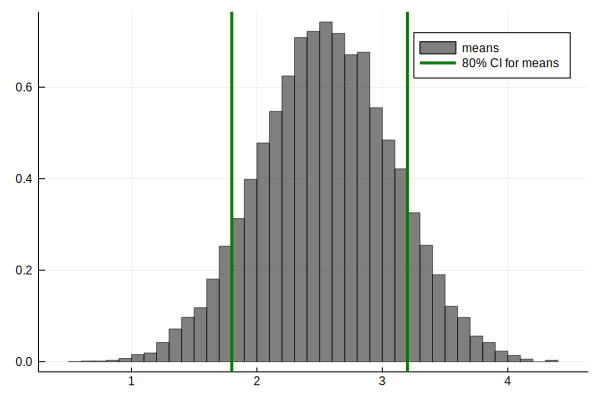

In [18]:
histogram(means, label="means", alpha=0.5, color=:black, norm=true)
vline!([means[2000],means[18000]], color=:green, label="80% CI for means", linewidth=3)

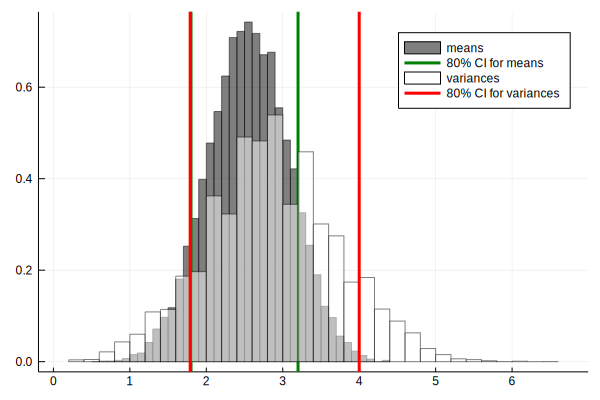

In [19]:
histogram!(vars, alpha=0.5, legend=true, label="variances", color=:white, norm=true, bins=40)
vline!([vars[2000], vars[18000]], color=:red, label="80% CI for variances", linewidth=3)

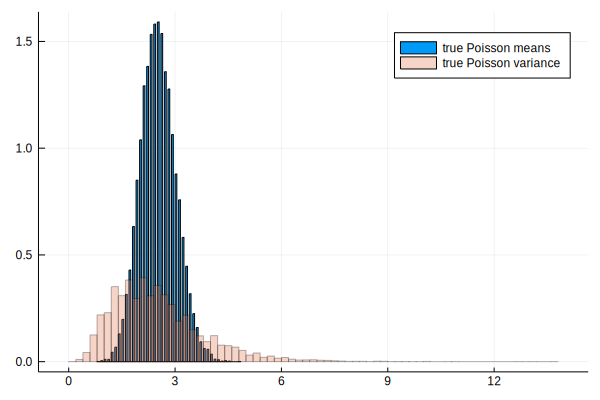

In [20]:
poisson_sample = rand(Poisson(2.5), 200000)
poisson_sample = reshape(poisson_sample, 20000,10)

means_p = []
vars_p = []

for i in 1:20000
    push!(means_p, mean(poisson_sample[i, :]))
    push!(vars_p, var(poisson_sample[i,:]))
end

histogram(means_p, norm=true, label="true Poisson means")
histogram!(vars_p, alpha=0.3, norm=true, label="true Poisson variance")
# mean(vars_p), mean(means_p)

#### 6

Although the CIs we got from 3, 4, 5 are very close to each other, I believe that the CI found by using CLT is not as good as the others since we only had 10 samples and since I approximated the population variance by using our sample variance. If we think $X$ is distributed as Poisson, then I could have used $\hat \lambda$ to approximate the population variance since if $X\sim Poisson$ then $E(X)=V(X)=\lambda$.

In question 2, we saw that the distribution of our sample does not look like Poisson. I wonder if using the $Y$ distribution is appropriate. Although we assumed that $X$ is distributed as Poisson, the distribution of $Y$ only takes $\bar x = \hat \lambda$ into account, which means that if we had data, $[0,0,0,0,0,5,5,5,5,5]$, the $Y$ distribution would produce exactly the same CI due to the assumption. On the other hand, the Bootstrap is more flexible due to no assumption about the distribution and takes each of our data into account. In our data, I can say that we have enough variation of data (0,1,2,3,4,5) that is enough for the Bootstrap to work well. Our data might have a Poisson distribution, but since we do not actually know about it, I would rather trust the Bootstrap CI. Among the Bootstap CIs, we can see that the CI for $\sigma^2$ has more variablity than the CI for $\mu$ so I would rather pick the CI for $\mu$ as the better CI for $\lambda$, which leads me to concluding that the Bootstrap CI for $\mu$ is the best of the four(the Bootstrap $\mu$, $\sigma^2$, $Y$, and CLT) .  

#### 7

If $X\sim Poisson(\lambda)$, $f(x) = \frac{\lambda ^xe^{-\lambda}}{x!}$. Therefore, $L(\lambda) = \prod_{i=1}^{n}f(x_i) = \lambda^{\sum_{i=1}^nx_i}*e^{-n\lambda}/\prod_{i=1}^n(x_i)!$ 

We can see that $L(\lambda)$ has the Gamma distribution, where $\alpha=(\sum_{i=1}^{n}x_i)+1, \theta=1/n$ (without scaling constant to make the integral over the domain equals 1). Therefore, if we set $h(\lambda)=kL(\lambda)$, then $\frac{\lambda^{\sum\,_{i=1}^{n}\,x_i}*e^{-\frac{\lambda}{\frac{1}{n}}}}{\Gamma(\{\sum\,_{i=1}^{n}x_i\} +1)(\frac{1}{n})^{(\sum_{i=1}^{n}x_i)+1}} = k*\frac{\lambda^{(\sum\,_{i=1}^{n}x_i)}*e^{-\frac{\lambda}{\frac{1}{n}}}}{\prod_{i=1}^{n}(x_i)!} \Leftrightarrow k = \frac{\prod_{i=1}^n\,(x_i)!}{(\frac{1}{n})^{(\sum_{i=1}^{n}x_i)+1}\,\,\Gamma(\{\sum_{i=1}^{n}x_i\}+1)}$. The values related to the parameters $x_i$s and $n$ can be found just by plugging the data we have, $[4,4,3,0,5,0,4,2,2,1]$. So $\alpha = 26, \theta=0.1$ 

Since we have found out that $\lambda \sim Gamma(26,0.1)$, we can use the inverse CDF to get an $80\%$ Bayesian CI for $\lambda$, which was $(2.0, 3.3)$. Therefore, there was $80\%$ chance that $\lambda$, the average number of cars heading south in every $6$ seconds was somewhere in the interval, $(2.0,3.3).$  This inverval is very close to the CI found in #3, which is probably what we expected to see beacuse a Poisson distribution (original) and a Gamma distribution have similar shape since smoothed Poisson is Gamma and since means are also close between Poisson(2.5)(mean=$2.5$) and Gamma(26,0.1)(mean=$2.6$), but there was a difference in interpretation since $\lambda$ is fixed in the frequency statistics while it has a distribution in Baysean.

In [21]:
al = sum([4,4,3,0,5,0,4,2,2,1])+1 ##=26
the = 0.1
denom = 10^-26*25*24*23*22*21*20*19*18*17*16*15*14*13*12*11*10*9*8*7*6*5*4*3*2*1
k = prod(factorial.([4,4,3,0,5,0,4,2,2,1]))/denom
h(λ) = k*λ^(al-1)*exp(-λ*10)/prod(factorial.([4,4,3,0,5,0,4,2,2,1]))

h (generic function with 1 method)

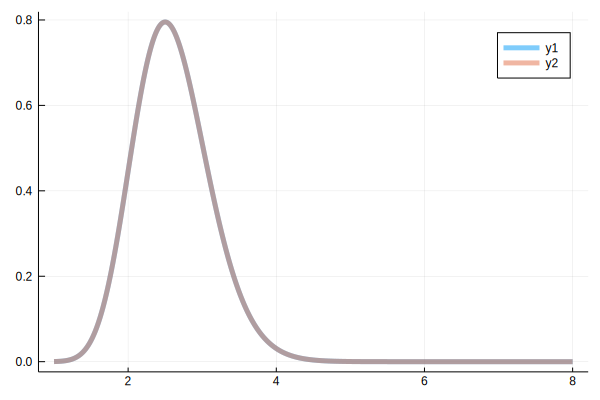

In [22]:
x_vec = 1:0.01:8
plot(x_vec, h.(x_vec), alpha=0.5, linewidth=5)
plot!(x_vec, pdf.(Gamma(al,the),x_vec), alpha=0.5, linewidth=5)

In [23]:
quantile(Gamma(al,the),0.1), quantile(Gamma(al,the),0.9)

(1.9716692426460978, 3.271120670716989)

#### 8 

Since $\lambda \sim Gamma(26,0.1)$, $E(\lambda) = \alpha\theta = 2.6$. This is close to the MLE ($2.5$), but since the Gamma(26,0.1) is not symmetric (slightly skewed right), the height (h(2.6) < h(2.5)). When a distribution has a single parameter like Poisson, a likelihood function has the parameter as its independent variable, and MLE is the maximizer of the likelihood function. (in our case $\lambda$ such that $L(\lambda)$ is the greatest). On the other hand, the mode of $h(\lambda)$ is $\lambda$ such that $h(\lambda)$ is the greatest (that means the instantenious probability is the highest at that point).Then we can see that there is bijection between $L(\lambda)$ and $h(\lambda)$ since the only difference is a scale (whether the integral under the curve is 1 or not ) so $L(\lambda)$ and $h(\lambda)$ have the same $\lambda$ that makes each of them greatest, which means MLE and the mode of $h(\lambda)$ are the same. 

In [24]:
h(2.5), h(2.6)

(0.7952295146806533, 0.7798866585178794)